In [1]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2')

Populating the interactive namespace from numpy and matplotlib


In [2]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))

318
312
311
310
310


## plot observation indicators and D3 indicators

In [3]:
maind = np.loadtxt('../proxy/GadgetX_DS_main')[loc,1:]

In [7]:
def calob_cov():
    dSZ = np.loadtxt('../proxy/GadgetX_DS_SZ')[loc,1:]
    dXray = np.loadtxt('../proxy/GadgetX_DS_Xray')[loc,1:]
    dOffset = np.loadtxt('../proxy/GadgetX_DS_Offset')[loc,1:]

    phyall = [dXray[:,2],dXray[:,-1],dSZ[:,-1],dOffset[:,1],dOffset[:,5],dOffset[:,2],dOffset[:,6]]
#     phyall = [dSZ[:,0],dSZ[:,1],dSZ[:,2],dSZ[:,3],dSZ[:,4],dSZ[:,5],dSZ[:,6]]
    d3fea = [maind[:,0], maind[:,5], maind[:,11], maind[:,-3]]
#     labelall = ['1','2','3','4','5','6','7']
    labelall = [r'$P_{\rm Xray}$', r'$M_{\rm Xray}$', r'$M_{\rm SZ}$', r'$R_{\rm SZ}$', r'$O_{\rm BCG-SZ}$', r'$R_{\rm X}$',r'$O_{\rm BCG-Py}$']
    labeld3 = [r'$\eta$',r'$\dot{M}_\mathrm{a}$','$r2$','$T_{500}$']
    covall = np.zeros(shape = (4,7))

    for i in range(4):
        for j in range(7):
            pro1 = d3fea[i]
            pro2 = phyall[j]
            cov = np.cov(pro1,pro2)
            coveff = cov[0][1] / cov[0][0]**0.5 / cov[1][1]**0.5
#             print('The correlation coefficient between %s and %s is %s' %(labeld3[i],labelall[j],coveff))

            covall[i,j] = coveff
    covall = np.around(covall, 2)
    print(covall)
    return covall, labelall, labeld3

In [5]:
def plot_obcov(ax):
    covall,labelall, labeld3 = calob_cov()

    covmap = ax.imshow(np.abs(covall), cmap = 'Blues',vmin = 0, vmax = 1)
    plt.colorbar(covmap, shrink = 0.85)
#     cbar = ax.colorbar()
#     cbar.ax.set_ylabel(r'$|\gamma|$', fontsize = 12)

    ax.set_xticklabels(labelall,fontsize = 12)
    ax.set_yticklabels(labeld3,fontsize = 10)
    ax.set_xticks(np.arange(len(labelall)))
    ax.set_yticks(np.arange(len(labeld3)))

    for i in range(len(labeld3)):
        for j in range(len(labelall)):
            text = ax.text(j, i, '%.2f' %covall[i, j], fontsize = 10,
                            ha="center", va="center", color="k")
	# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
 #         rotation_mode="anchor")
# 	ax.invert_xaxis()
# 	ax.invert_yaxis()

    ax.tick_params( labelsize = 11, direction = 'out')
    bwith = 1.2 #边框宽度设置为2
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
    return covmap

## plot a combination

<IPython.core.display.Javascript object>


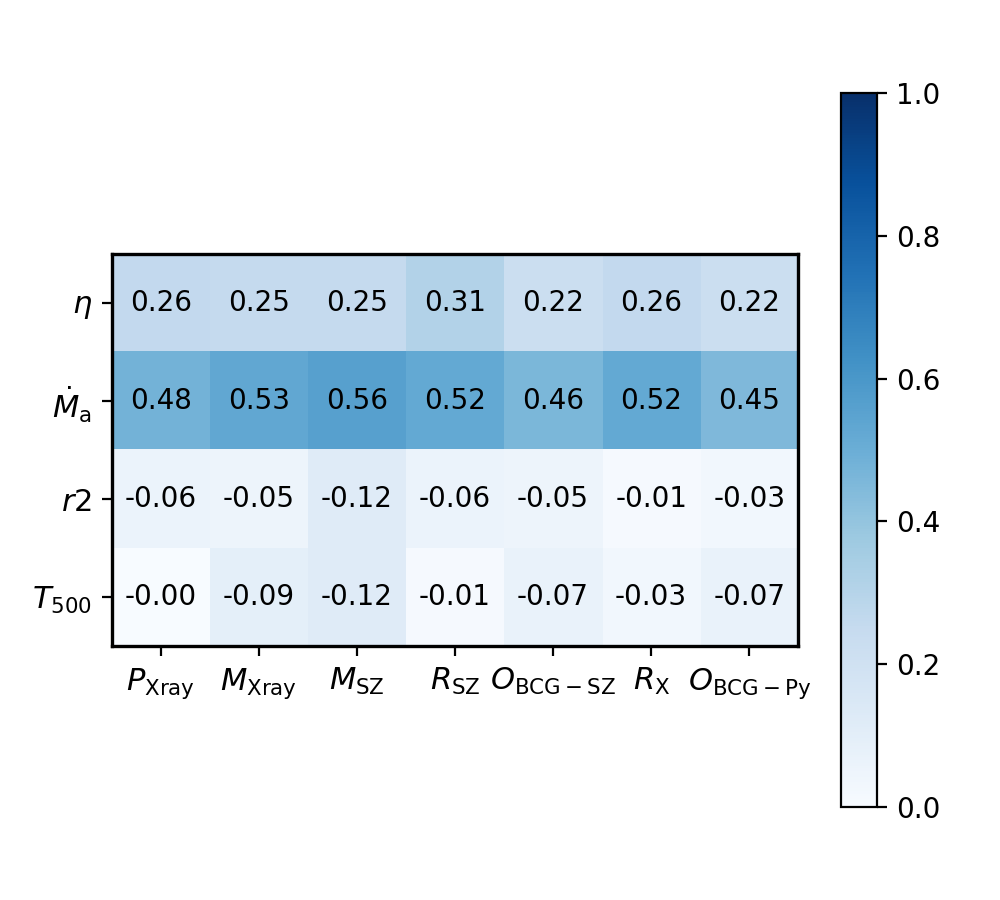

[[ 0.26  0.25  0.25  0.31  0.22  0.26  0.22]
 [ 0.48  0.53  0.56  0.52  0.46  0.52  0.45]
 [-0.06 -0.05 -0.12 -0.06 -0.05 -0.01 -0.03]
 [-0.   -0.09 -0.12 -0.01 -0.07 -0.03 -0.07]]


In [8]:
fig, ax = plt.subplots(figsize = (5,4.5))

covmap = plot_obcov(ax)

plt.tight_layout()
plt.show()
# plt.savefig('./figs/cc2.pdf')

## test for correlation coefficient of map indicators

The correlation coefficient between $P_{\rm Xray}$ and $P_{\rm Xray}$ is 1.0000000000000002
The correlation coefficient between $P_{\rm Xray}$ and $M_{\rm Xray}$ is 0.8820830412481152
The correlation coefficient between $P_{\rm Xray}$ and $M_{\rm SZ}$ is 0.7013214130280008
The correlation coefficient between $P_{\rm Xray}$ and $R_{\rm SZ}$ is 0.61763054059342
The correlation coefficient between $P_{\rm Xray}$ and $R_{\rm X}$ is 0.6349998505896421
The correlation coefficient between $P_{\rm Xray}$ and $O_{\rm BCG-SZ}$ is 0.5344437248726374
The correlation coefficient between $P_{\rm Xray}$ and $O_{\rm BCG-Py}$ is 0.5782477758319009
The correlation coefficient between $M_{\rm Xray}$ and $P_{\rm Xray}$ is 0.8820830412481152
The correlation coefficient between $M_{\rm Xray}$ and $M_{\rm Xray}$ is 1.0
The correlation coefficient between $M_{\rm Xray}$ and $M_{\rm SZ}$ is 0.8265608543525793
The correlation coefficient between $M_{\rm Xray}$ and $R_{\rm SZ}$ is 0.6801085880905723
The correlat

<IPython.core.display.Javascript object>


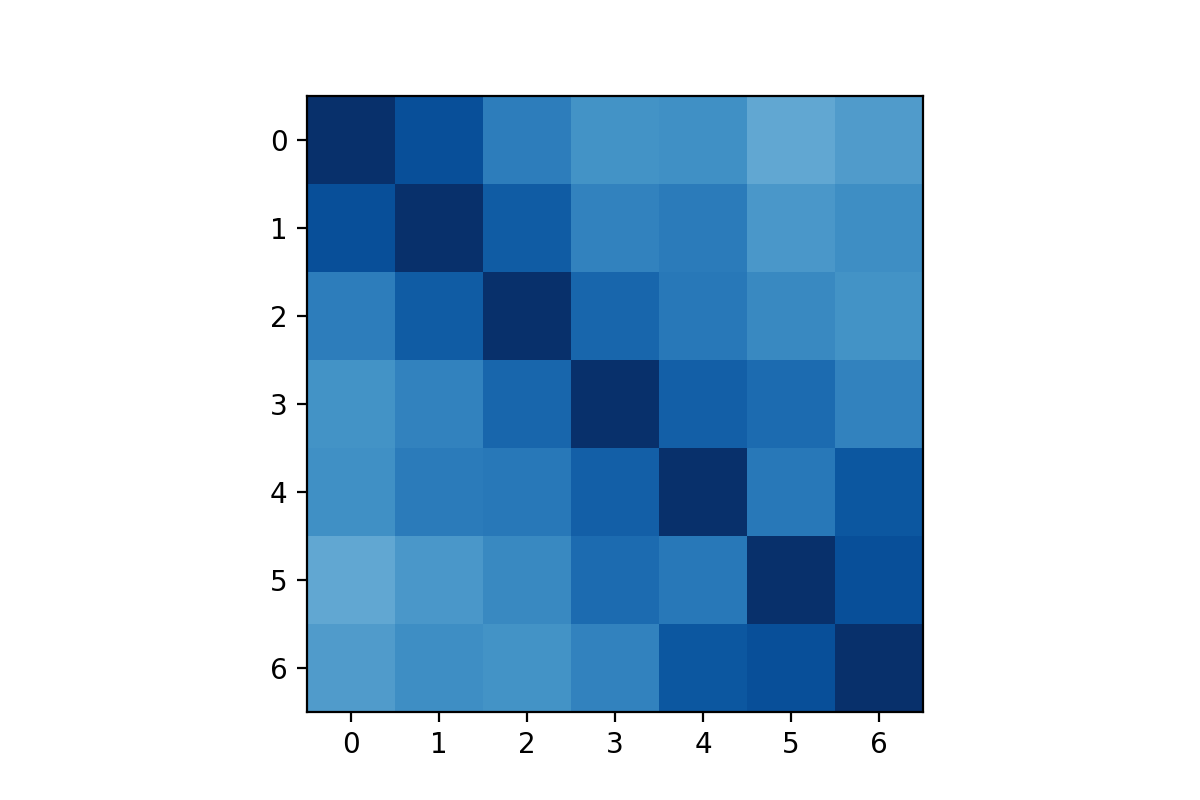

In [17]:
dSZ = np.loadtxt('../proxy/GadgetX_DS_SZ')[loc,1:]
dXray = np.loadtxt('../proxy/GadgetX_DS_Xray')[loc,1:]
dOffset = np.loadtxt('../proxy/GadgetX_DS_Offset')[loc,1:]

phyall = [dXray[:,2],dXray[:,-1],dSZ[:,-1],dOffset[:,1],dOffset[:,2],dOffset[:,5],dOffset[:,6]]
labelall = [r'$P_{\rm Xray}$', r'$M_{\rm Xray}$', r'$M_{\rm SZ}$', r'$R_{\rm SZ}$', r'$R_{\rm X}$',r'$O_{\rm BCG-SZ}$',r'$O_{\rm BCG-Py}$']
covall = np.zeros(shape = (7,7))

for i in range(7):
    for j in range(7):
        pro1 = phyall[i]
        pro2 = phyall[j]
        cov = np.cov(pro1,pro2)
        coveff = cov[0][1] / cov[0][0]**0.5 / cov[1][1]**0.5
        print('The correlation coefficient between %s and %s is %s' %(labelall[i],labelall[j],coveff))

        covall[i,j] = coveff
covall = np.around(covall, 2)
    
plt.figure(figsize = (6,4))
covmap = plt.imshow(np.abs(covall), cmap = 'Blues',vmin = 0, vmax = 1)